In [161]:
# <-- Import libraries, custom functions, and load configuration & datasets <--

import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from collections import Counter

# <-- Imports custom preprocessing functions from 'functions.py' <--

from functions import (drop_duplicates,
                       concat_dataframes,
                       remove_all_punctuation,
                       drop_irrelevant_columns,
                       standardize_column_names,
                       filter_by_regex_pattern,
                       standardize_dates
                       )

# <-- Loads YAML configuration to dynamically reference CSV output files. <--

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")
config

df_other = pd.read_csv(config['output_data']['file1'])
df_data_analyst = pd.read_csv(config['output_data']['file2'])
df_keywords = pd.read_csv(config['output_data']['file3'])


In [162]:
# Display df_other DataFrame structure and summary
df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             2586 non-null   int64  
 1   agency             2586 non-null   object 
 2   #_of_positions     2586 non-null   int64  
 3   business_title     2586 non-null   object 
 4   level              2586 non-null   object 
 5   job_category       2586 non-null   object 
 6   career_level       2586 non-null   object 
 7   salary_range_from  2586 non-null   float64
 8   salary_range_to    2586 non-null   float64
 9   salary_frequency   2586 non-null   object 
 10  preferred_skills   683 non-null    object 
 11  posting_date       1001 non-null   object 
 12  post_until         1155 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 262.8+ KB


In [163]:
# Display df_data_analyst DataFrame structure and summary
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             74 non-null     int64  
 1   agency             74 non-null     object 
 2   #_of_positions     74 non-null     int64  
 3   business_title     74 non-null     object 
 4   level              74 non-null     object 
 5   job_category       74 non-null     object 
 6   career_level       74 non-null     object 
 7   salary_range_from  74 non-null     float64
 8   salary_range_to    74 non-null     float64
 9   salary_frequency   74 non-null     object 
 10  preferred_skills   41 non-null     object 
 11  posting_date       33 non-null     object 
 12  post_until         52 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.6+ KB


In [164]:
# Display df_keywords DataFrame structure and summary
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             2649 non-null   int64  
 1   agency             2649 non-null   object 
 2   #_of_positions     2649 non-null   int64  
 3   business_title     2649 non-null   object 
 4   level              2649 non-null   object 
 5   job_category       2649 non-null   object 
 6   career_level       2649 non-null   object 
 7   salary_range_from  2649 non-null   float64
 8   salary_range_to    2649 non-null   float64
 9   salary_frequency   2649 non-null   object 
 10  preferred_skills   2649 non-null   object 
 11  posting_date       1026 non-null   object 
 12  post_until         814 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 269.2+ KB


In [165]:
# Apply standard date formatting to all DataFrames
data_frames = [df_keywords,df_data_analyst,df_other]
date_cols = ['posting_date', 'post_until']
for df in data_frames:
    df = standardize_dates(df,date_cols)

d:\vscode101\first_project\notebooks\functions.py:51: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


In [166]:
# Inspect df_keywords after date standardization
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   job_id             2649 non-null   int64         
 1   agency             2649 non-null   object        
 2   #_of_positions     2649 non-null   int64         
 3   business_title     2649 non-null   object        
 4   level              2649 non-null   object        
 5   job_category       2649 non-null   object        
 6   career_level       2649 non-null   object        
 7   salary_range_from  2649 non-null   float64       
 8   salary_range_to    2649 non-null   float64       
 9   salary_frequency   2649 non-null   object        
 10  preferred_skills   2649 non-null   object        
 11  posting_date       1026 non-null   datetime64[ns]
 12  post_until         335 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory us

In [167]:
# Newly graduated data engineers looking to start a data analytics company targeting New York’s public sector, the EDA (exploratory data analysis) should help to find answers:

# How in-demand are data roles and data engineering skills in NYC government jobs?
# Which agencies/departments are hiring for these roles?
# What is the salary landscape for these jobs?
# What skill trends and requirements are there?
# How have postings for these roles evolved over time?
# What are the contract types, seniority, and job categories for data roles?

In [168]:
regex_pattern = r"(sql|tableau|bi|phyton|eda|llm|ai|ml|pandas|numpy|oracle)"
# regex_pattern = r"\b\w+(sql|tableau|bi|phyton|eda|llm|ai|ml|pandas|numpy|oracle)\w*\b"

def extract_skills(text):
    return list(set(re.findall(regex_pattern, str(text).lower())))

df_keywords['matched_skills'] = df_keywords['preferred_skills'].apply(extract_skills)

df_keywords

,job_id,agency,#_of_positions,business_title,level,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,preferred_skills,posting_date,post_until,matched_skills
0,631363,dept of environment protection,1,2024 bws010 early warning remote modeling inte...,00,engineering architecture planning,student,16.0,16.0,hourly,student must currently be enrolled at a colleg...,2024-04-02,2024-11-06,[bi]
1,629002,office of criminal justice,1,senior coordinator capital projects,00,engineering architecture planning,experienced non manager,59116.0,80000.0,annual,a baccalaureate degree from an accredited coll...,2024-03-05,NaT,"[ai, bi]"
2,613253,dept of design construction,1,director,m2,engineering architecture planning,manager,64922.0,144066.0,annual,preference will be given to candidates with at...,2023-11-06,NaT,[ai]
3,589443,department of transportation,3,community coordinator,00,constituent services community programs,experienced non manager,59116.0,91768.0,annual,excellent communication oral and written prese...,NaT,NaT,"[ai, bi]"
4,617287,dept of design construction,2,senior contract manager,00,finance accounting procurement,experienced non manager,70611.0,81203.0,annual,candidates should have excellent organizationa...,NaT,NaT,[ai]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,719349,consumer and worker protection,1,inspector 719349,01,public safety inspections enforcement,experienced non manager,49396.0,56805.0,annual,strong written and oral communication skills p...,NaT,2025-11-10,[ai]
2645,715522,bronx district attorney,2,programmer,00,technology data innovation,experienced non manager,85078.0,85078.0,annual,qualifications experience or familiarity with ...,NaT,NaT,"[bi, ml, sql, ai]"
2646,721328,dept of environment protection,1,dir of executive administration bureau adminis...,m4,administration human resources,manager,94050.0,242675.0,annual,experience managing a shared service team prov...,NaT,NaT,"[ai, bi]"
2647,711128,dept of design construction,1,surveyor,1b,engineering architecture planning,experienced non manager,70248.0,80785.0,annual,candidate should possess a minimum of three 3 ...,NaT,NaT,[bi]


In [169]:
# Use matched_skills for frequency count
all_skills = [skill for sublist in df_keywords['matched_skills'] for skill in sublist]
skill_counts = Counter(all_skills)
skills_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count']).sort_values('count', ascending=False)
display(skills_df.head(10))

,skill,count
0,bi,2270
1,ai,1526
3,sql,173
2,ml,69
6,oracle,33
5,tableau,27
4,llm,8
7,pandas,1
8,eda,1


In [170]:
top_skills = skills_df.head(10)['skill']

skill_metrics = []
for skill in top_skills:
    skill_jobs = df_keywords[df_keywords['preferred_skills'].str.lower().str.contains(skill, na=False)]
    num_postings = len(skill_jobs)
    median_salary = skill_jobs['salary_range_from'].median()
    top_agency = skill_jobs['agency'].value_counts().idxmax() if not skill_jobs.empty else None
    skill_metrics.append({
        'Skill': skill,
        'Number of Postings': num_postings,
        'Median Salary': median_salary,
        'Top Hiring Agency': top_agency
    })
summary_skills = pd.DataFrame(skill_metrics)
summary_skills

,Skill,Number of Postings,Median Salary,Top Hiring Agency
0,bi,2270,68213.0,dept of environment protection
1,ai,1526,66958.5,dept of environment protection
2,sql,173,86101.0,dept of environment protection
3,ml,69,93288.0,dept of design construction
4,oracle,33,92301.0,nyc housing authority
5,tableau,27,80000.0,dept of health mental hygiene
6,llm,8,35008.0,dept of environment protection
7,pandas,1,103026.0,department of transportation
8,eda,1,98470.0,department of transportation


In [171]:
pivot_agency = df_keywords.pivot_table(index='agency', values='#_of_positions', aggfunc='sum').sort_values('#_of_positions', ascending=False)
pivot_agency.head(10)

,#_of_positions
agency,
dept of environment protection,848
dept of design construction,587
department of transportation,460
hra dept of social services,338
dept of health mental hygiene,319
bronx district attorney,249
nyc housing authority,243
dept of parks recreation,139
department of correction,120


In [172]:
# Career Level & Salary
# Pivot Table: Median salary by career level and role type.

career_salary = pd.concat([
    df_data_analyst.assign(group='Data Analyst/Engineer'),
    df_keywords.assign(group='With Data Skills'),
    df_other.assign(group='Other')
])
pivot_table = career_salary.pivot_table(index='career_level', columns='group', values='salary_range_from', aggfunc='median')
display(pivot_table)

group,Data Analyst/Engineer,Other,With Data Skills
career_level,,,
entry level,NaN,51227.0,56313.0
executive,NaN,150000.0,127013.0
experienced non manager,82506.0,64142.0,67757.0
manager,78721.0,85000.0,81083.0
student,18.0,17.0,16.0


In [173]:
# Pivot, Melt, Stack/Unstack Examples
# Stack/Unstack Example: Salary by Agency and Group

salary_agency = career_salary.pivot_table(index='agency', columns='group', values='salary_range_from', aggfunc='median')
salary_agency = salary_agency.stack().reset_index()
salary_agency.columns = ['agency', 'group', 'median_salary']
display(salary_agency.sort_values('median_salary', ascending=False).head(20))

,agency,group,median_salary
121,office of the comptroller,Other,110000.0
124,office of the mayor,With Data Skills,107500.0
107,nyc police pension fund,With Data Skills,104768.5
129,taxi limousine commission,Data Analyst/Engineer,101216.5
38,department of correction,With Data Skills,100000.0
76,financial info svcs agency,Data Analyst/Engineer,97500.0
82,housing preservation dvlpmnt,Data Analyst/Engineer,95233.0
94,manhattan community board 7,With Data Skills,95000.0
132,technology innovation,With Data Skills,94050.0
39,department of finance,Data Analyst/Engineer,93568.0


In [174]:
# Summary Table: Key Metrics
# Build a summary table for the Total data roles and Total jobs with data skills:

summary = pd.DataFrame({
    'Total data roles': [len(df_data_analyst)],
    'Total jobs with data skills': [len(df_keywords)],
    'Median salary (analyst)': [df_data_analyst['salary_range_from'].median()],
    'Median salary (skills)': [df_keywords['salary_range_from'].median()],
    'Top hiring agency': [pivot_agency.index[0]],
    'Most requested skill': [skills_df.iloc[0]['skill']]
})
summary

,Total data roles,Total jobs with data skills,Median salary (analyst),Median salary (skills),Top hiring agency,Most requested skill
0,74,2649,82506.0,66546.0,dept of environment protection,bi


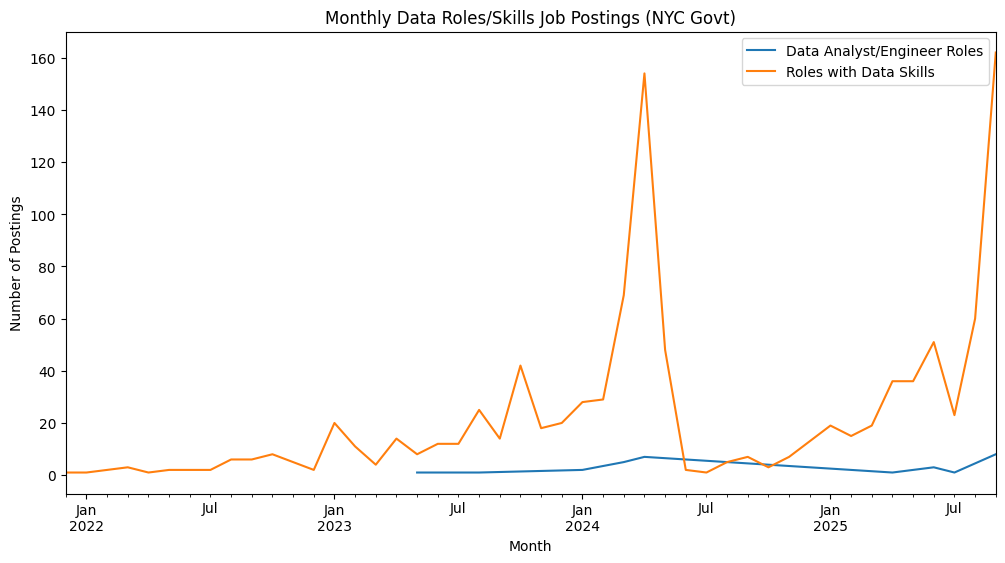

In [175]:
# Plot: Number of Postings by Month/Year
# This is essential to know if demand is rising.

# Make sure posting_date is datetime
df_data_analyst['posting_date'] = pd.to_datetime(df_data_analyst['posting_date'])
df_keywords['posting_date'] = pd.to_datetime(df_keywords['posting_date'])

# Group by month
analyst_monthly = df_data_analyst.groupby(df_data_analyst['posting_date'].dt.to_period('M')).size()
keywords_monthly = df_keywords.groupby(df_keywords['posting_date'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
analyst_monthly.plot(label='Data Analyst/Engineer Roles')
keywords_monthly.plot(label='Roles with Data Skills')
plt.title('Monthly Data Roles/Skills Job Postings (NYC Govt)')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.legend()
plt.show()

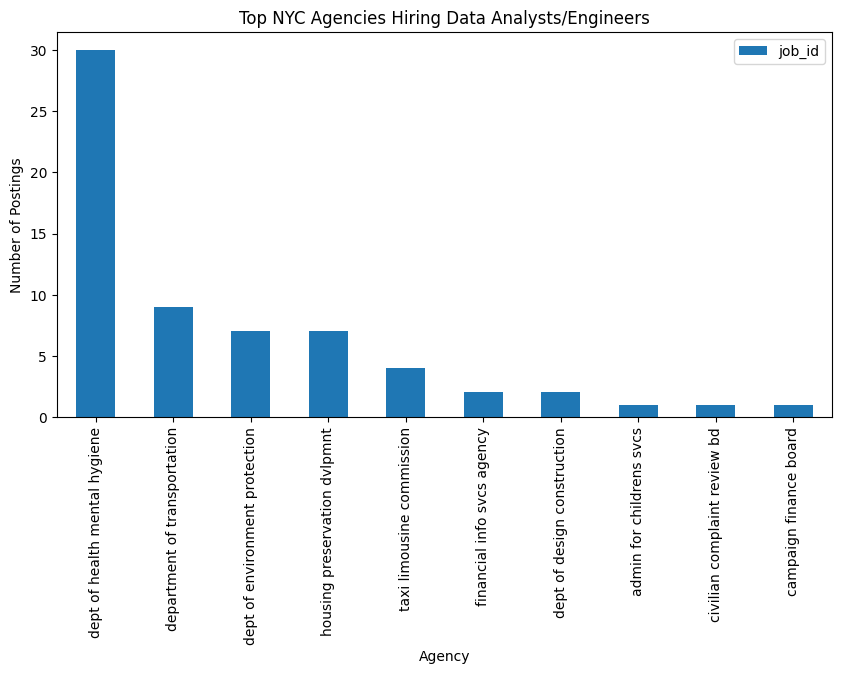

In [176]:
# Top Agencies/Departments Hiring Data Engineers
# Pivot Table + Bar Plot
# Find which agencies are most likely to be your clients.

pivot_agency = df_data_analyst.pivot_table(index='agency', values='job_id', aggfunc='count').sort_values('job_id', ascending=False)
pivot_agency.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top NYC Agencies Hiring Data Analysts/Engineers')
plt.xlabel('Agency')
plt.ylabel('Number of Postings')
# plt.xticks(rotation=30)
plt.show()

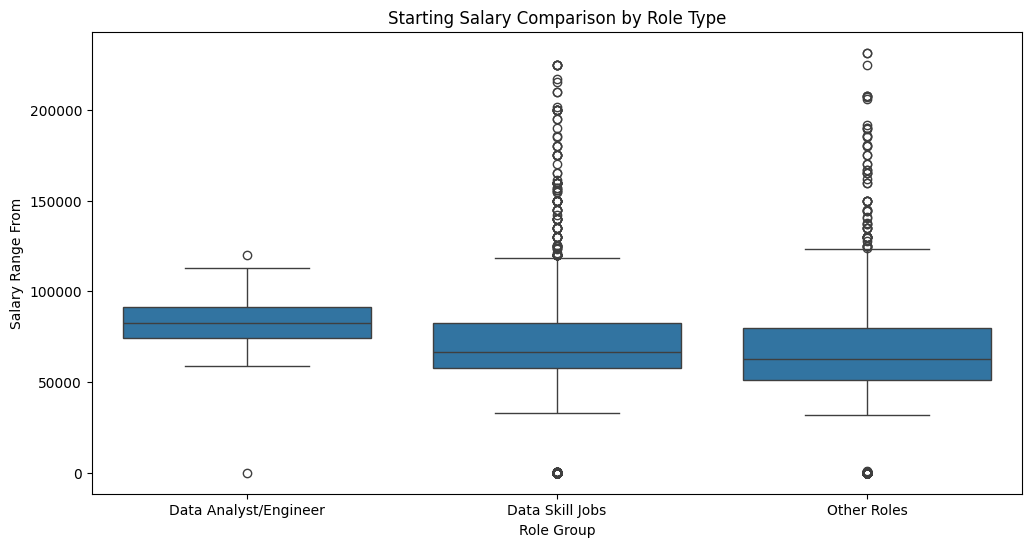

In [177]:
# Salary Analysis: How Lucrative Are Data Roles?
# Plot: Salary Distribution by Role/Skill
# Compare distributions for analyst roles, keyword roles, and other jobs.

plt.figure(figsize=(12,6))
sns.boxplot(data=pd.concat([
    df_data_analyst.assign(group='Data Analyst/Engineer'),
    df_keywords[~df_keywords['job_id'].isin(df_data_analyst['job_id'])].assign(group='Data Skill Jobs'),
    df_other.assign(group='Other Roles')
]), x='group', y='salary_range_from')
plt.title('Starting Salary Comparison by Role Type')
plt.ylabel('Salary Range From')
plt.xlabel('Role Group')
plt.show()

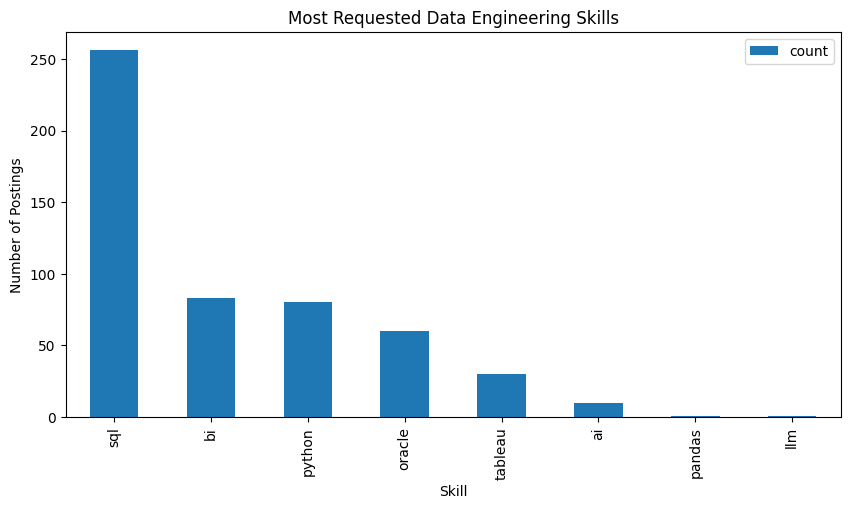

In [178]:
# Skill Trends: What Skills Are Most In Demand?
# Pivot Table + Bar Plot

# Count the most common skills in 'preferred_skills'
from collections import Counter

skills_list = df_keywords['preferred_skills'].dropna().str.lower().str.split()
skills_counts = Counter([skill for sublist in skills_list for skill in sublist if skill in ['sql','tableau','bi','python','eda','llm','ai','ml','pandas','numpy','oracle']])
skills_df = pd.DataFrame.from_dict(skills_counts, orient='index').reset_index()
skills_df.columns = ['skill', 'count']
skills_df.sort_values('count', ascending=False).plot.bar(x='skill', y='count', figsize=(10,5))
plt.title('Most Requested Data Engineering Skills')
plt.ylabel('Number of Postings')
plt.xlabel('Skill')
plt.show()

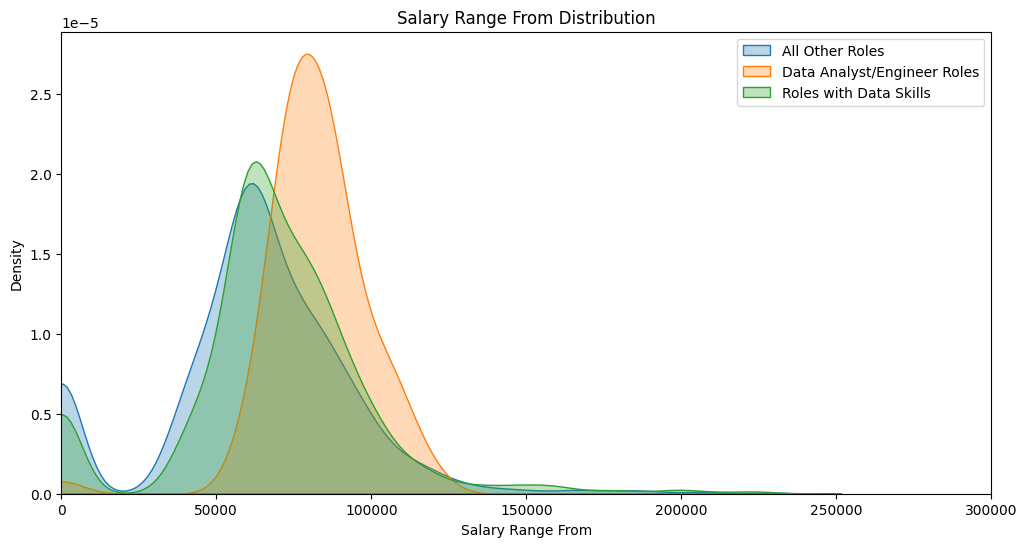

In [179]:
# 1. Salary Distribution Comparison
# Insight:
# Data roles and jobs requiring modern data skills tend to have higher salary ranges than the general job population.

# What to look for:
# Are data roles and “preferred_skills” roles shifted higher than the general population?
# Are there outliers or salary bands unique to these groups?

# --> Visualize salary distributions across job groups
#
# - Plots kernel density estimates (KDE) for starting salary ranges across all jobs, data roles, and roles with data skills.
# - Reveals differences in salary bands and highlights whether data-centric roles command higher pay or exhibit unique outliers.
#
# How to read this chart:
# - Each curve shows the distribution of starting salaries for a group.
# - Peaks indicate the most common salary ranges; curves shifted right mean higher salaries.
# - Compare the three groups to see which roles typically offer higher or lower starting pay.

plt.figure(figsize=(12,6))
sns.kdeplot(df_other['salary_range_from'], label='All Other Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['salary_range_from'], label='Data Analyst/Engineer Roles', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['salary_range_from'], label='Roles with Data Skills', fill=True, alpha=0.3)
plt.title('Salary Range From Distribution')
plt.xlabel('Salary Range From')
plt.xlim(0, 300000)
plt.legend()
plt.savefig("../figures/figure1.jpeg", dpi=600, format="jpg")
plt.show()

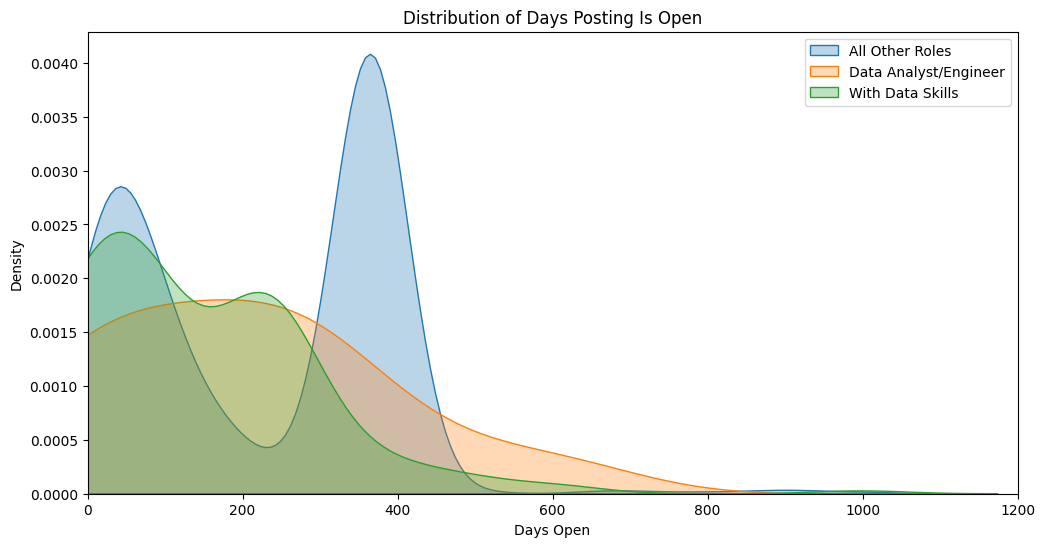

In [180]:
# 8. Days Posting is Open
# Insight:
# Do data roles stay posted longer or shorter than the general population?

# What to look for:
# Are data roles posted for longer or shorter periods?

# --> Plot the distribution of days each posting was open by group
#
# - Shows the number of days a job remained posted (from posting to expiration/closing).
# - Highlights differences in hiring speed or demand for data roles versus the general job market.
#
# How to read this chart:
# - The x-axis shows how many days postings were open; the y-axis shows the frequency.
# - Compare group curves: a curve shifted right means jobs stay open longer; left means quicker filling.
# - Outliers or long tails suggest hard-to-fill roles.

for df in [df_other, df_data_analyst, df_keywords]:
    df['days_open'] = (df['post_until'] - df['posting_date']).dt.days

plt.figure(figsize=(12,6))
sns.kdeplot(df_other['days_open'].dropna(), label='All Other Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['days_open'].dropna(), label='Data Analyst/Engineer', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['days_open'].dropna(), label='With Data Skills', fill=True, alpha=0.3)
plt.title('Distribution of Days Posting Is Open')
plt.xlabel('Days Open')
plt.xlim(0, 1200)
plt.legend()
plt.show()

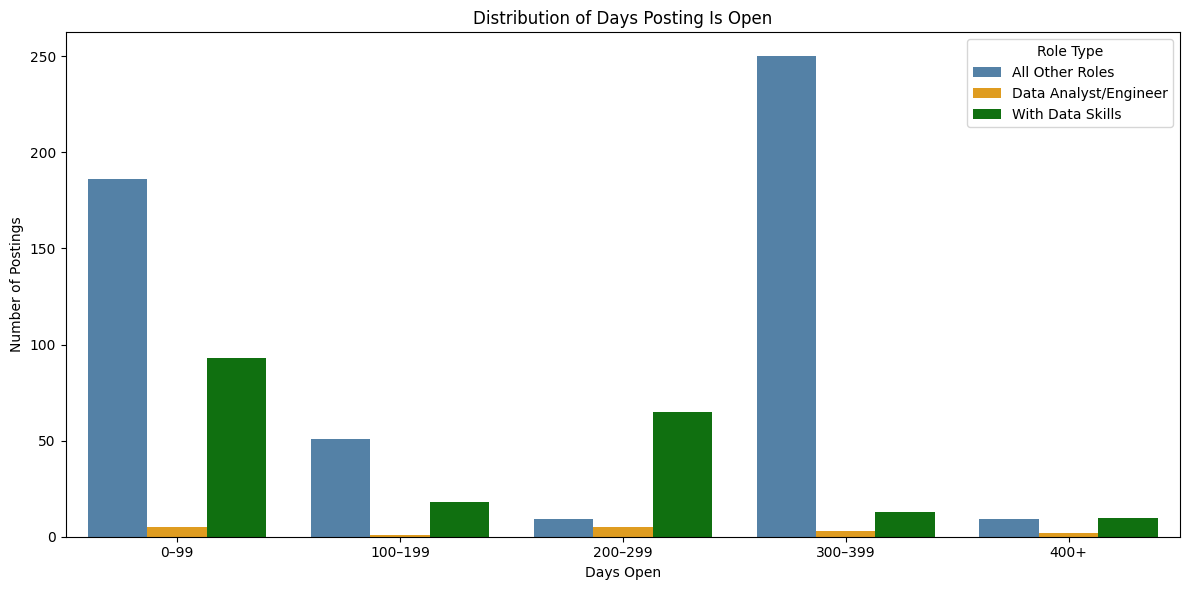

In [182]:
# Calculate days_open
for df in [df_other, df_data_analyst, df_keywords]:
    df['days_open'] = (df['post_until'] - df['posting_date']).dt.days

# Define bins and labels (note: 6 edges for 5 labels)
bins = [0, 100, 200, 300, 400, 10000]
labels = ["0–99", "100–199", "200–299", "300–399", "400+"]

# Categorize into bins
df_other['days_bin'] = pd.cut(df_other['days_open'], bins=bins, labels=labels, include_lowest=True, right=False)
df_data_analyst['days_bin'] = pd.cut(df_data_analyst['days_open'], bins=bins, labels=labels, include_lowest=True, right=False)
df_keywords['days_bin'] = pd.cut(df_keywords['days_open'], bins=bins, labels=labels, include_lowest=True, right=False)

# Count postings per bin
other_counts = df_other['days_bin'].value_counts().reindex(labels, fill_value=0)
data_counts = df_data_analyst['days_bin'].value_counts().reindex(labels, fill_value=0)
keywords_counts = df_keywords['days_bin'].value_counts().reindex(labels, fill_value=0)

# Combine into a single DataFrame
dist_df = pd.DataFrame({
    'Days Range': labels,
    'All Other Roles': other_counts.values,
    'Data Analyst/Engineer': data_counts.values,
    'With Data Skills': keywords_counts.values
})

# Melt for seaborn
dist_melted = dist_df.melt(id_vars='Days Range', var_name='Category', value_name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dist_melted,
    x='Days Range',
    y='Count',
    hue='Category',
    palette={
        'All Other Roles': 'steelblue',
        'Data Analyst/Engineer': 'orange',
        'With Data Skills': 'green'
    }
)

plt.title('Distribution of Days Posting Is Open')
plt.xlabel('Days Open')
plt.ylabel('Number of Postings')
plt.legend(title='Role Type')
plt.tight_layout()

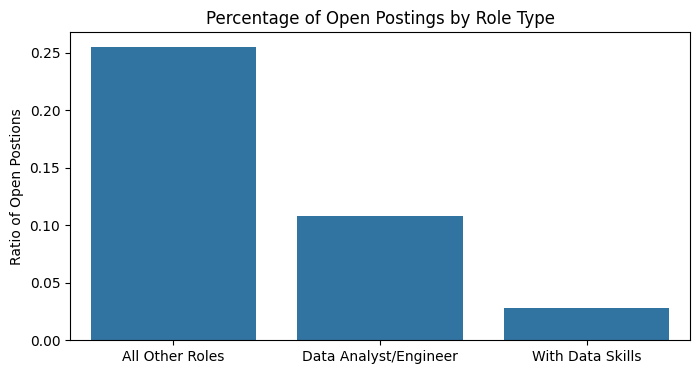

In [181]:
# 7. Open vs Expired Postings
# Insight:
# Are data jobs open for longer or more likely to still be open?

# What to look for:
# Are a greater percentage of data roles still open?

# -- > Compare the status (open vs expired) of job postings by group
#
# - Uses a count plot or pie chart to show the proportion of currently open vs expired job postings in each group.
# - Helps understand if data roles stay open longer, or if they fill/expire faster than typical jobs.
#
# How to read this chart:
# - Each bar (or pie slice) shows the number or proportion of jobs still open versus expired.
# - Compare across groups to see if data jobs are harder to fill (more open) or more quickly filled (fewer open).

import datetime as dt

today = pd.Timestamp(dt.datetime.now())
for df in [df_other, df_data_analyst, df_keywords]:
    df['is_open'] = df['post_until'] > today

plt.figure(figsize=(8,4))
sns.barplot(x=['All Other Roles','Data Analyst/Engineer','With Data Skills'],
            y=[df_other['is_open'].mean(), df_data_analyst['is_open'].mean(), df_keywords['is_open'].mean()])
plt.title('Percentage of Open Postings by Role Type')
plt.ylabel('Ratio of Open Postions')
plt.show()